# Step-2 Details Instructions:
1.	List of variables selected for model built.
    * Unemployment rate
    * 10-year Treasury yield
    * Prime rate', 
    * 'House Price Index (Level)'
    * Unemployment rate_lag_1', 
    * 'Unemployment rate_lag_2
    * Log of (Dow Jones Total Stock Market Index (Level)),  
    * House Price Index (Level)_YOY
    * Mortgage rate.





2.	Correlation and Autocorrelation Requirements:

    *	For these nine variables create a correlation matrix and heatmap (table and graph). Multicollinearity for each variable, based on VIF values. 

    * Create a summary statistic, with number of observations, Mean, Std. Dev, Sum, Minimum and Maximum.

    * Autocorrelation and White Noise Test: Perform Augmented Dickey-Fuller Unit Root Test (Rho, Tau, F values) to highlight autocorrelation. You can also visually inspect the autocorrelation function plot or perform statistical tests such as the Ljung-Box test or the Durbin-Watson test to check for significant autocorrelation.

    * Exclude variables with negative results (you can send the results to me at this time if required to further narrow the list down).



3.	For the remaining variables built models,

    * I would recommend using the following (which I follow in SAS): GLIMMIX procedure in SAS, random effects (random residuals), binomial distribution, link equals logit.

    * You can try other alternatives (as part of step C), but please add comments on relevant code so that I can understand the applied methods.

    * model fit statistics should include AIC, BIC statistics and others ( I am assuming there is a command in Python which will generate all relevant one as there is in SAS). In-Sample Actual Default rate vs. Predicted default rate (curves).

    * Perform seven to eight iterations using different combinations, such as Unemployment rate, 10-year Treasury yield.

    * The results of each of these eight iterations, including the above-mentioned statistics and in-sample plots, should be added in the deliverable report.



4.	Final variables (3 variables tops) should be based on variable signs, statistical significance, In-Sample RMSE, and other model fit statistics (BIC and AIC) of the eight iterations performed in step-2 above.



5.	 Once the model is finalized we will perform out-of-sample testing in the next steps.



**Note: Deliver a separate HTML, and a .py and an IPYNB files for this step. Please don’t create this as an add-on to Step-1, instead a separate deliverable and files.**



In [55]:
import pandas as pd
import numpy as np


In [56]:

df_training  = pd.read_excel('Datasets/Modeling Data-V03.xlsx',sheet_name='training_data')
df_testing  = pd.read_excel('Datasets/Modeling Data-V03.xlsx',sheet_name='testing_data')

# Proprocessing

## Transformation

In [57]:
df_transformed_training = df_training
# Step 2: Perform data transformation - Log Transformation
#  Defines a list called Defines a list called log_transform_variables 
# that contains the names of variables to be log-transformed.

log_transform_variables = ['Dow Jones Total Stock Market Index (Level)',
                            'House Price Index (Level)',
                            'Commercial Real Estate Price Index (Level)']

# Loop through the variables to be log-transformed
# Applies the natural logarithm (np.log()) to the selected variable.
# Creates a new column with the log-transformed values using
for var in log_transform_variables:
    # Apply the natural logarithm to the selected variable and create a new column with the log-transformed values
    df_transformed_training[f'log_{var}'] = np.log(df_transformed_training[var])

# Step 3: Perform data transformation - Year-over-Year Change
# Defines a list called yoy_change_variables that contains the names
# of variables for which year-over-year changes will be calculated
yoy_change_variables = ['Dow Jones Total Stock Market Index (Level)',
                        'House Price Index (Level)',
                        'Commercial Real Estate Price Index (Level)']

# Loop through the variables for year-over-year change calculation
for var in yoy_change_variables:
    # Calculate the percentage change over a four-quarter period (assuming quarterly data)
    # Creates a new column with the year-over-year change values using
    df_transformed_training[f'{var}_YOY'] = df_transformed_training[var].pct_change(3) * 100

# Step 4: Perform data transformation - Lags/Leads
# Defines the range of lags to be considered for lag/lead transformation.
lags = range(1, 7)  # Lags of up to six quarters
# Defines a list called lag_lead_variables that contains the names of variables for which lagged values will be created
lag_lead_variables = ['Unemployment rate', '10-year Treasury yield', 'Mortgage rate']

# Loop through the variables for lag/lead transformation
# Loop through the variables for lag/lead transformation
for var in lag_lead_variables:
    # Loop through the specified lags
    for lag in lags:
        # Shift the variable values by the specified lag and create new columns with lagged values
        # Shifts the variable values by the specified lag using 
        df_transformed_training[f'{var}_lag_{lag}'] = df_transformed_training[var].shift(lag)


# this code will save the transformed data into csv file in the current directory
df_transformed_training.to_csv('Transformed_dataset.csv',index=False)

In [58]:
interested_features = [
                        'DRS-Target Variable',
                        '10-year Treasury yield',
                        'Prime rate','House Price Index (Level)',
                        'Unemployment rate_lag_1', 
                        'Unemployment rate_lag_2',
                        'log_Dow Jones Total Stock Market Index (Level)',  
                        'House Price Index (Level)_YOY',
                        'Mortgage rate',
                        ]

df_transformed_training = df_transformed_training[interested_features]
df_transformed_training =  df_transformed_training.iloc[6:]
df_transformed_training = df_transformed_training.reset_index(drop=True)
df_transformed_training.head(5)

,DRS-Target Variable,10-year Treasury yield,Prime rate,House Price Index (Level),Unemployment rate_lag_1,Unemployment rate_lag_2,log_Dow Jones Total Stock Market Index (Level),House Price Index (Level)_YOY,Mortgage rate
0,1.42,4.4,5.4,171.9,5.4,5.4,9.361971,11.695906,5.8
1,1.55,4.2,5.9,178.8,5.3,5.4,9.380648,12.241055,5.7
2,1.59,4.3,6.4,185.0,5.1,5.3,9.415963,12.053301,5.8
3,1.64,4.6,7.0,190.2,5.0,5.1,9.433260,10.645724,6.2
4,1.60,4.7,7.4,193.1,5.0,5.0,9.482015,7.997763,6.2


# Step-2
 1. For these nine variables create a correlation matrix and heatmap (table and graph). Multicollinearity for each variable, based on VIF values.

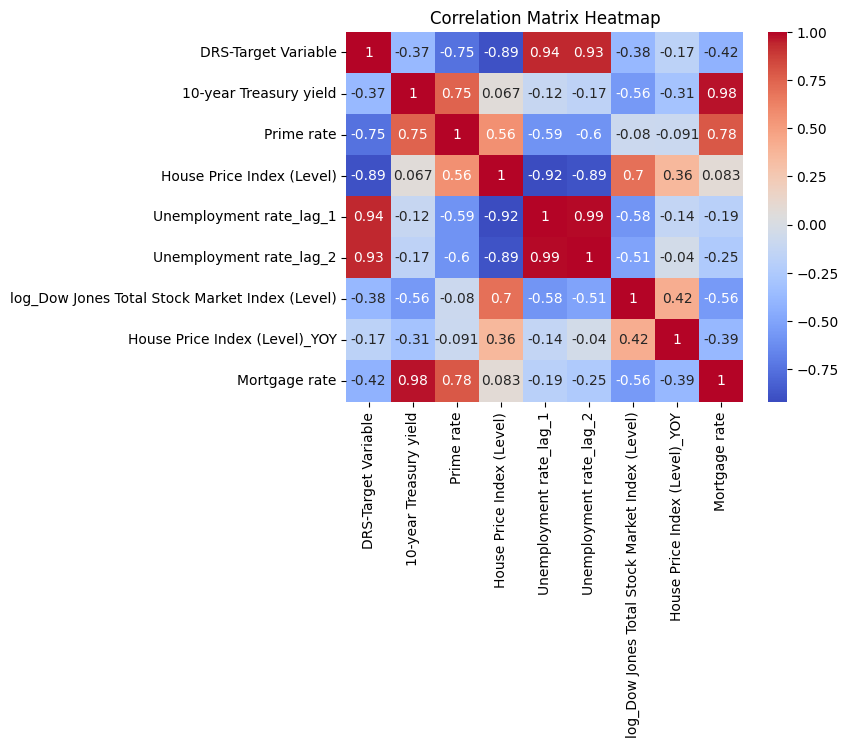

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# This line calculates the correlation matrix of the df_transformed_training DataFrame.
# The correlation matrix is a square matrix that shows the correlation coefficients between pairs of variables.
# It provides a measure of the linear relationship between variables
correlation_matrix = df_transformed_training.corr()

# This line creates a heatmap using the Seaborn library. 
# The heatmap() function is used to plot the correlation matrix as a color-encoded rectangular grid. 
# The correlation_matrix is passed as the input data. The annot=True parameter adds numeric values to each cell of the heatmap,
# representing the correlation coefficients. The cmap='coolwarm' parameter sets the color palette for the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# This line sets the title of the plot to 'Correlation Matrix Heatmap' 
# using the title() function from the Matplotlib library
plt.title('Correlation Matrix Heatmap')
plt.show()

# Summary
# Given Code : calculates the correlation matrix for a given DataFrame and visualizes it as a heatmap using Seaborn.
# The heatmap provides a visual representation of the correlation between variables, 
# with higher correlation values shown in warmer colors and lower correlation values shown in cooler colors


In [60]:
# This line imports the variance_inflation_factor function
# from the statsmodels.stats.outliers_influence module.
# This function is used to calculate the variance inflation factor, 
# which is a measure of multicollinearity between variables in a regression model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store the VIF values
# this line creates an empty DataFrame called vif_data to store 
# the variable names and their corresponding VIF values
vif_data = pd.DataFrame()

# This line assigns the column names of the df_transformed_
# training DataFrame to the 'Variable' column in the vif_data 
# DataFrame. This will store the names of the variables for
# which VIF values are calculated.
predictors_df = df_transformed_training.iloc[:,1:]
vif_data['Variable'] = predictors_df.columns


# This line calculates the VIF values for each variable
# in the df_transformed_training DataFrame and 
# assigns them to the 'VIF' column in the vif_data DataFrame.
# The VIF values are computed using a list comprehension, 
# where variance_inflation_factor is applied to each column of the 
# df_transformed_training DataFrame using the range() function
vif_data['VIF'] = [variance_inflation_factor(predictors_df.values, i) for i in range(predictors_df.shape[1])]


vif_data

# summary, 
# Given code calculates the VIF values for each variable in the df_transformed_training DataFrame. 
# The VIF values indicate the degree of multicollinearity between variables, 
# with higher values indicating stronger multicollinearity. 
# The results are stored in a DataFrame called vif_data and 
# then printed to the console.


,Variable,VIF
0,10-year Treasury yield,399.922084
1,Prime rate,84.061378
2,House Price Index (Level),1584.041360
3,Unemployment rate_lag_1,721.293720
4,Unemployment rate_lag_2,846.707158
5,log_Dow Jones Total Stock Market Index (Level),2915.691100
6,House Price Index (Level)_YOY,3.165315
7,Mortgage rate,1066.915484


In [61]:
updated_predictor = predictors_df.drop('House Price Index (Level)',axis=1)
updated_predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = updated_predictor.columns
vif_data['VIF'] = [variance_inflation_factor(updated_predictor.values, i) for i in range(updated_predictor.shape[1])]
vif_data

,Variable,VIF
0,10-year Treasury yield,283.130443
1,Prime rate,56.900745
2,Unemployment rate_lag_1,715.184761
3,Unemployment rate_lag_2,660.174255
4,log_Dow Jones Total Stock Market Index (Level),141.840967
5,House Price Index (Level)_YOY,2.193561
6,Mortgage rate,730.413548


In [62]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the specified columns from the predictors_df
columns_to_drop = ['House Price Index (Level)', 'log_Dow Jones Total Stock Market Index (Level)']
updated_predictor = predictors_df.drop(columns_to_drop, axis=1)

# Calculate VIF for each variable in updated_predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = updated_predictor.columns
vif_data['VIF'] = [variance_inflation_factor(updated_predictor.values, i) for i in range(updated_predictor.shape[1])]

# Print the VIF data
print(vif_data)


                        Variable         VIF
0         10-year Treasury yield   76.471166
1                     Prime rate   55.752033
2        Unemployment rate_lag_1  707.548535
3        Unemployment rate_lag_2  659.654433
4  House Price Index (Level)_YOY    1.621184
5                  Mortgage rate  210.897864


In [63]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the specified columns from the predictors_df
columns_to_drop = ['Unemployment rate_lag_2', 'House Price Index (Level)', 'log_Dow Jones Total Stock Market Index (Level)']
updated_predictor = predictors_df.drop(columns_to_drop, axis=1)

# Calculate VIF for each variable in updated_predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = updated_predictor.columns
vif_data['VIF'] = [variance_inflation_factor(updated_predictor.values, i) for i in range(updated_predictor.shape[1])]

# Print the VIF data
print(vif_data)


                        Variable         VIF
0         10-year Treasury yield   73.295917
1                     Prime rate   50.581024
2        Unemployment rate_lag_1   18.334385
3  House Price Index (Level)_YOY    1.252499
4                  Mortgage rate  209.631747


In [64]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the specified columns from the predictors_df
columns_to_drop = ['10-year Treasury yield','Unemployment rate_lag_2', 'House Price Index (Level)', 'log_Dow Jones Total Stock Market Index (Level)']
updated_predictor = predictors_df.drop(columns_to_drop, axis=1)

# Calculate VIF for each variable in updated_predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = updated_predictor.columns
vif_data['VIF'] = [variance_inflation_factor(updated_predictor.values, i) for i in range(updated_predictor.shape[1])]

# Print the VIF data
print(vif_data)


                        Variable         VIF
0                     Prime rate   50.164525
1        Unemployment rate_lag_1   16.291920
2  House Price Index (Level)_YOY    1.236072
3                  Mortgage rate  100.307276


In [65]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the specified columns from the predictors_df
columns_to_drop = ['Mortgage rate','10-year Treasury yield','Unemployment rate_lag_2', 'House Price Index (Level)', 'log_Dow Jones Total Stock Market Index (Level)']
updated_predictor = predictors_df.drop(columns_to_drop, axis=1)

# Calculate VIF for each variable in updated_predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = updated_predictor.columns
vif_data['VIF'] = [variance_inflation_factor(updated_predictor.values, i) for i in range(updated_predictor.shape[1])]

# Print the VIF data
print(vif_data)


                        Variable       VIF
0                     Prime rate  3.294323
1        Unemployment rate_lag_1  3.285024
2  House Price Index (Level)_YOY  1.051726



Autocorrelation - Augmented Dickey-Fuller Test Results:

Variable: DRS-Target Variable
ADF Statistic                  -2.692612
p-value                         0.075325
# Lags Used                     4.000000
Number of Observations Used    55.000000
dtype: float64

Variable: 10-year Treasury yield
ADF Statistic                  -1.184460
p-value                         0.680245
# Lags Used                     2.000000
Number of Observations Used    57.000000
dtype: float64

Variable: Prime rate
ADF Statistic                  -3.469074
p-value                         0.008818
# Lags Used                     3.000000
Number of Observations Used    56.000000
dtype: float64

Variable: House Price Index (Level)
ADF Statistic                  -0.884130
p-value                         0.793154
# Lags Used                     5.000000
Number of Observations Used    54.000000
dtype: float64

Variable: Unemployment rate_lag_1
ADF Statistic                  -1.546206
p-value                    

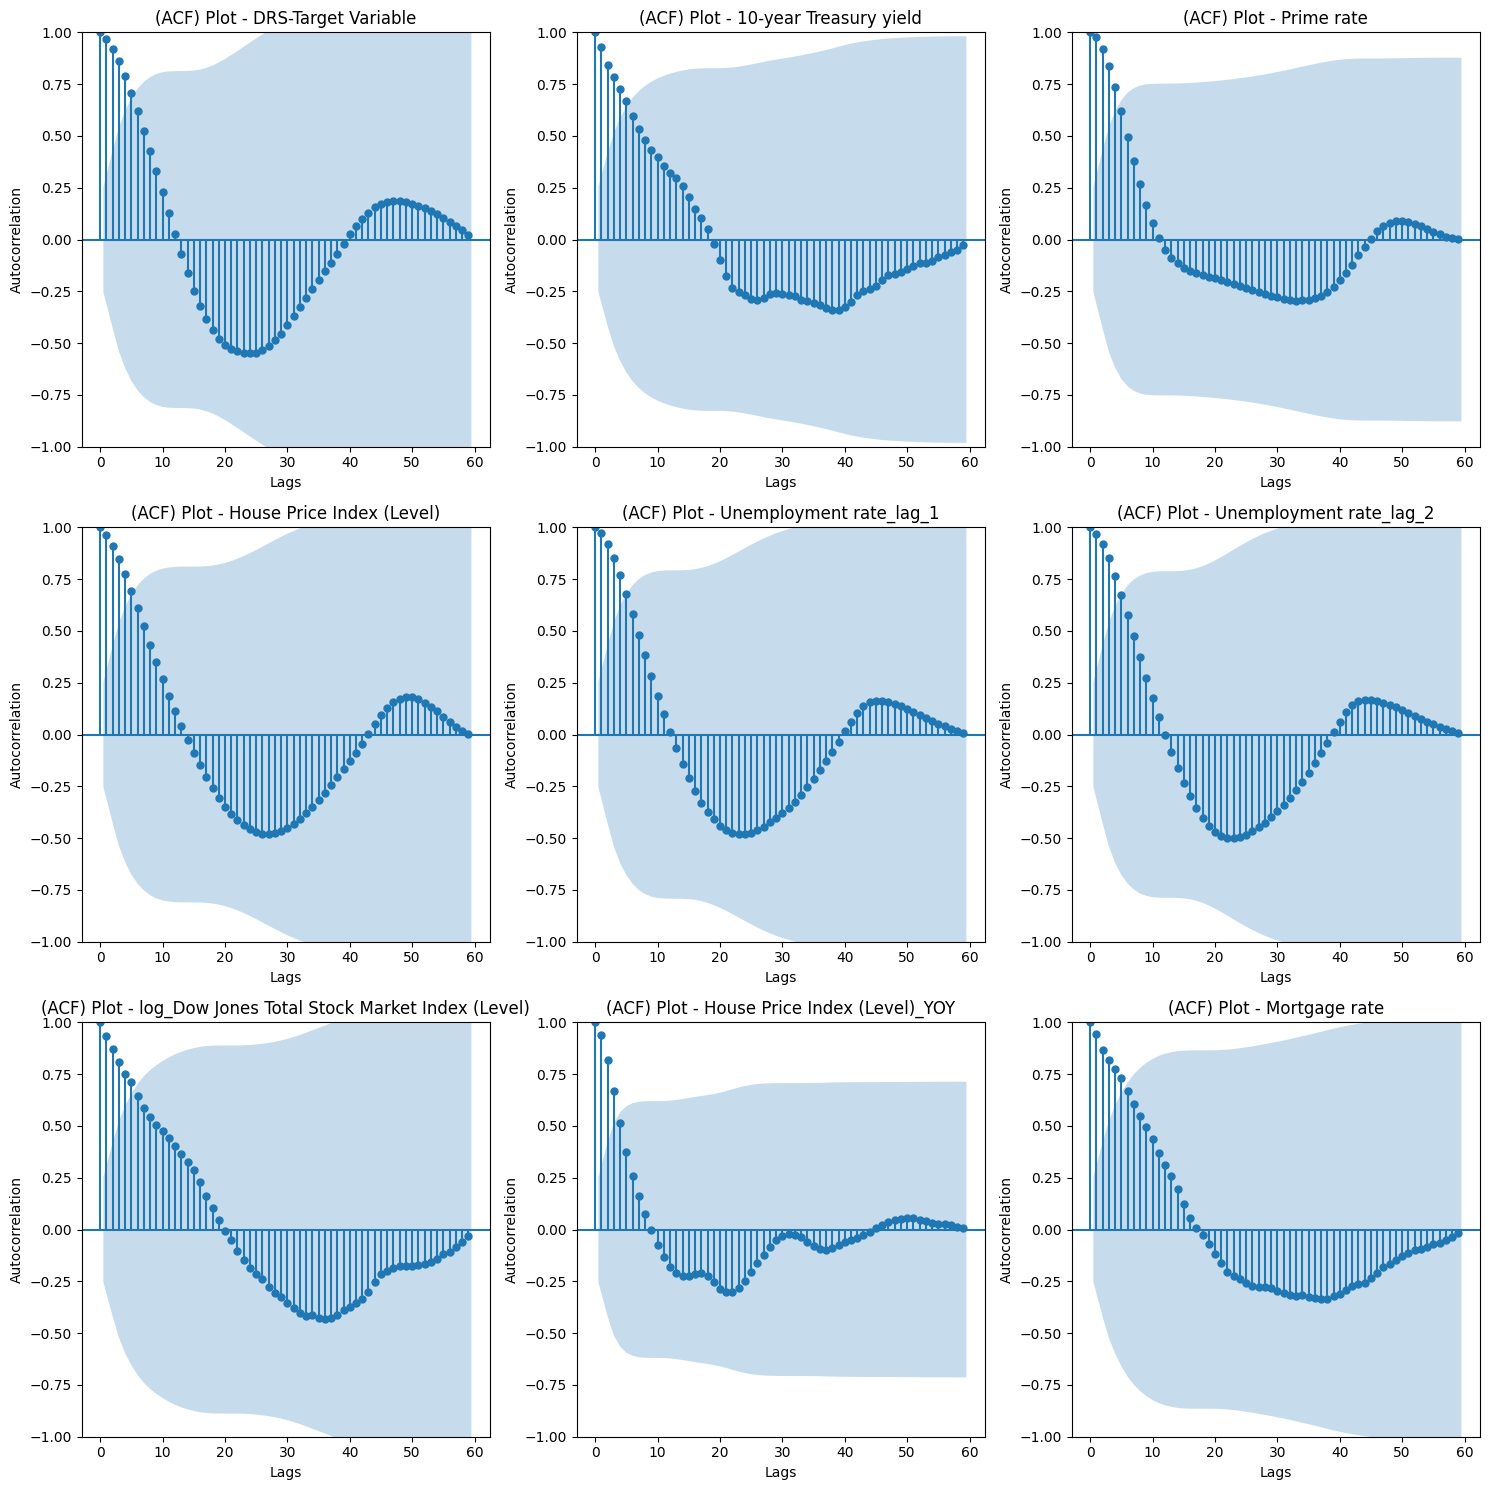

In [66]:
import statsmodels.api as sm

# Perform Augmented Dickey-Fuller test for autocorrelation on each variable
# This line initializes an empty dictionary adf_results that will store the 
# results of the Augmented Dickey-Fuller (ADF) test for each variable.
adf_results = {}

#  This loop iterates over each column in the df DataFrame.
for column in df_transformed_training.columns:
    # his line performs the ADF test using the sm.tsa.stattools.adfuller() function from the statsmodels library. It calculates the ADF statistic, p-value, number of lags used, and number of observations used for the variable column
    adf_test = sm.tsa.stattools.adfuller(df_transformed_training[column])
    #This line creates a pandas Series with the ADF test results and assigns it to the adf_results dictionary using the variable column as the key. The Series is indexed with labels ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'].
    adf_results[column] = pd.Series(adf_test[:4], index=['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])

# Display the ADF test results for each variable
print("\nAutocorrelation - Augmented Dickey-Fuller Test Results:")

# This loop iterates over each key-value pair in the adf_results dictionary.
for column, results in adf_results.items():
    # This line prints the name of the variable being analyzed
    print("\nVariable:", column)
    # This line prints the ADF test results for the variable. The results variable contains the Series with the ADF statistic, 
    # p-value, number of lags used, and number of observations used
    print(results)

# Visualize autocorrelation function (ACF) plot for each variable

# This line calculates the number of variables in the DataFrame.
num_variables = len(df_transformed_training.columns)
# This line sets the number of columns for the subplots to be displayed
num_cols = 3  # Set the number of columns for subplots

# This line calculates the number of rows needed for the subplots based on the number of variables and columns
num_rows = (num_variables + num_cols - 1) // num_cols
#  This line creates a figure and axes for the subplots, with the specified number of rows and columns. 
# The figsize parameter determines the size of the figure.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))


# The following loop iterates over each variable in the DataFrame and plots the autocorrelation function (ACF) for that variable
for i, column in enumerate(df_transformed_training.columns):
    # This line calculates the row index for the subplot based on the current iteration index
    row = i // num_cols
    # : This line calculates the column index for the subplot based on the current iteration index.
    col = i % num_cols
    # This line selects the current subplot for plotting.
    ax = axes[row, col]
    
    #  This line plots the autocorrelation function (ACF) for the variable column using the sm.graphics.tsa.plot_acf() function from the statsmodels library. The lags parameter determines the number of lags to include in the plot
    sm.graphics.tsa.plot_acf(df_transformed_training[column], lags=len(df_transformed_training[column])-1, ax=ax)
    # This line sets the title of the subplo
    ax.set_title("(ACF) Plot - " + column)
    # This line sets the label
    ax.set_xlabel("Lags")
    ax.set_ylabel("Autocorrelation")

# This line adjusts the layout of the subplots to prevent overlapping
plt.tight_layout()
# This line displays the subplots.
plt.show()
# In summary, this code performs the Augmented Dickey-Fuller (ADF) test for autocorrelation on each variable in the df DataFrame. It prints the ADF test results and visualizes the autocorrelation function (ACF) plot for each variable.

In [67]:

# Calculate summary statistics
summary_stats = df_transformed_training.describe().transpose()

# Display the summary statistics
print("\nSummary Statistics:")
summary_stats



Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
DRS-Target Variable,60.0,5.812167,3.336709,1.420000,2.800000,4.945000,9.360000,11.480000
10-year Treasury yield,60.0,3.066667,1.040806,1.600000,2.200000,2.800000,3.900000,5.200000
Prime rate,60.0,4.546667,1.674481,3.300000,3.300000,3.500000,5.325000,8.300000
House Price Index (Level),60.0,168.996667,24.676764,133.400000,142.775000,171.350000,190.225000,214.100000
Unemployment rate_lag_1,60.0,6.131667,1.969642,3.600000,4.600000,5.300000,7.850000,9.900000
Unemployment rate_lag_2,60.0,6.161667,1.943969,3.600000,4.675000,5.350000,7.850000,9.900000
log_Dow Jones Total Stock Market Index (Level),60.0,9.726728,0.353813,8.992707,9.469948,9.617690,9.982763,10.405335
House Price Index (Level)_YOY,60.0,1.605091,5.982292,-13.422007,-1.425234,3.588308,4.408165,12.241055
Mortgage rate,60.0,4.708333,0.989486,3.400000,3.900000,4.400000,5.725000,6.600000


# Modeling the Data

In [70]:
columns_to_drop = ['Mortgage rate','10-year Treasury yield','Unemployment rate_lag_2', 'House Price Index (Level)', 'log_Dow Jones Total Stock Market Index (Level)']
input_data = df_transformed_training.drop(columns_to_drop,axis=1)


input_data.head(5)

,DRS-Target Variable,Prime rate,Unemployment rate_lag_1,House Price Index (Level)_YOY
0,1.42,5.4,5.4,11.695906
1,1.55,5.9,5.3,12.241055
2,1.59,6.4,5.1,12.053301
3,1.64,7.0,5.0,10.645724
4,1.60,7.4,5.0,7.997763


                  Generalized Linear Model Regression Results                  
Dep. Variable:     DRS-Target Variable   No. Observations:                    5
Model:                             GLM   Df Residuals:                        1
Model Family:                 Binomial   Df Model:                            3
Link Function:                   Logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                 123.72
Date:                 Thu, 01 Jun 2023   Deviance:                       208.80
Time:                         21:47:44   Pearson chi2:                 7.19e+15
No. Iterations:                      2   Pseudo R-squ. (CS):                nan
Covariance Type:             nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
cons

/home/iffi/anaconda3/envs/sep_darts_2/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/home/iffi/anaconda3/envs/sep_darts_2/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1057: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights
/home/iffi/anaconda3/envs/sep_darts_2/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to 

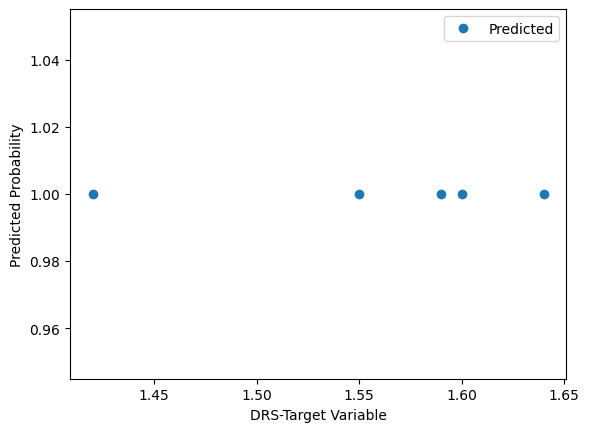

In [74]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
data = pd.DataFrame({
    'DRS-Target Variable': [1.42, 1.55, 1.59, 1.64, 1.60],
    'Prime rate': [5.4, 5.9, 6.4, 7.0, 7.4],
    'Unemployment rate_lag_1': [5.4, 5.3, 5.1, 5.0, 5.0],
    'House Price Index (Level)_YOY': [11.695906, 12.241055, 12.053301, 10.645724, 7.997763]
})

# Define the predictors and response variable
predictors = ['Prime rate', 'Unemployment rate_lag_1', 'House Price Index (Level)_YOY']
response = 'DRS-Target Variable'

# Fit the GLMM model
model = sm.GLM(data[response], sm.add_constant(data[predictors]), family=sm.families.Binomial())
result = model.fit()

# Print the model summary
print(result.summary())

# Generate predicted probabilities
data['Predicted Probability'] = result.predict(sm.add_constant(data[predictors]))

# Calculate AIC and BIC
AIC = result.aic
BIC = result.bic

# Print AIC and BIC
print("AIC:", AIC)
print("BIC:", BIC)

# Plot in-sample actual default rate vs. predicted default rate
import matplotlib.pyplot as plt

plt.plot(data[response], data['Predicted Probability'], 'o', label='Predicted')
plt.xlabel('DRS-Target Variable')
plt.ylabel('Predicted Probability')
plt.legend()
plt.show()
